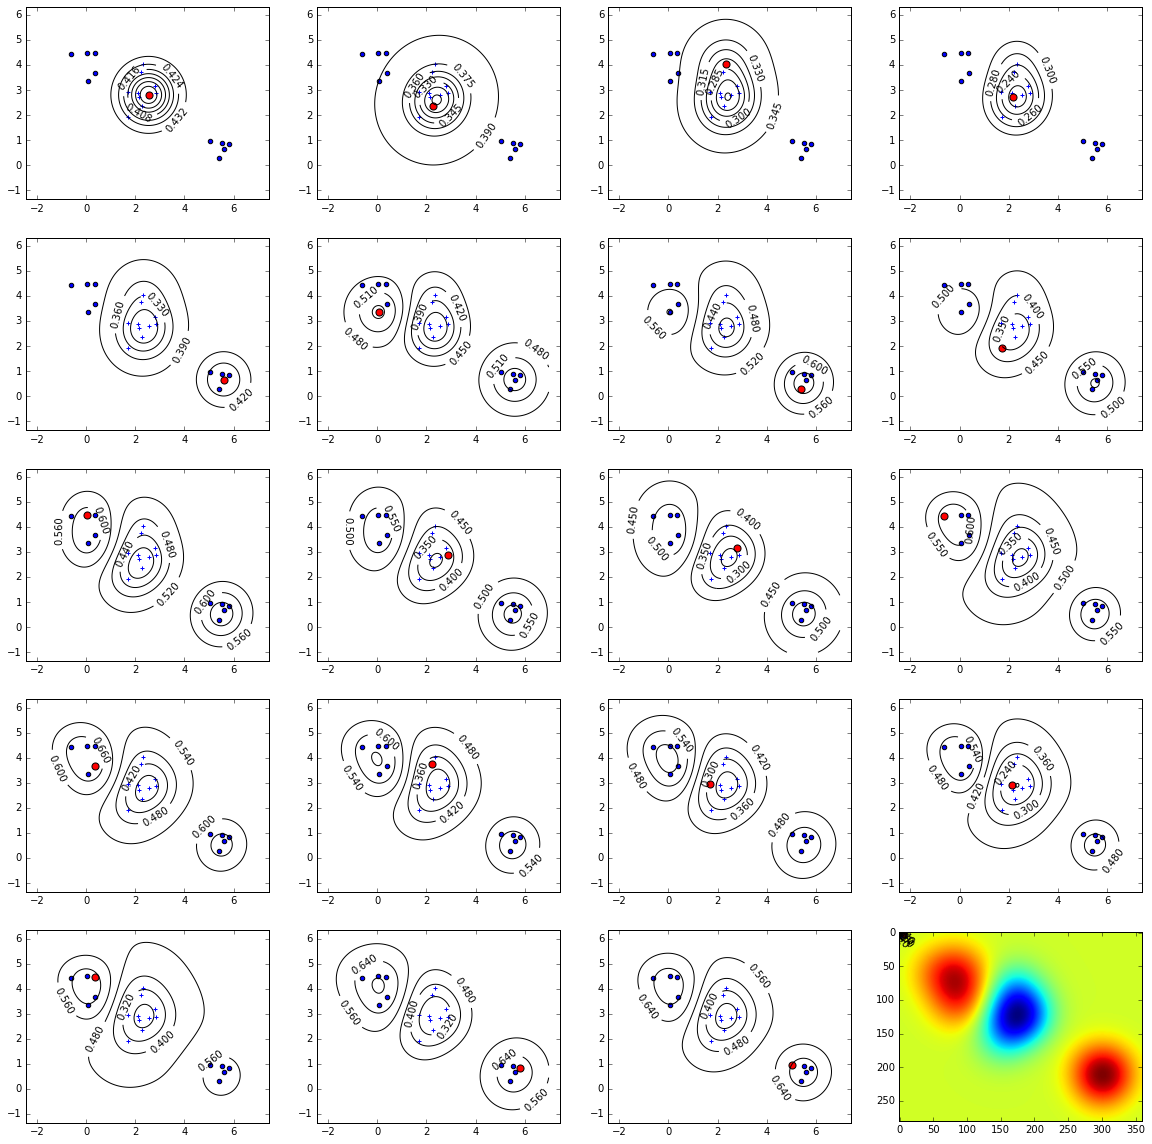

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pypl

##
# Régression logistique à noyau (entraîné par descente de gradient stochastique)
##

# Génération des données d'entraînement
# (X_1,t_1) et (X_2,t_2) sont les données de 2 classes différentes
X_1_1 = 0.5*np.random.randn(5,2) + np.array([[5,1]]) # Gaussienne centrée en mu_1_1=[5,1]
X_1_2 = 0.5*np.random.randn(5,2) + np.array([[0,4]]) # Gaussienne centrée en mu_1_1=[0,4]
X_1 = np.vstack([X_1_1,X_1_2])
t_1 = np.ones(10)
X_2 = 0.5*np.random.randn(10,2) + np.array([[2,3]]) # Gaussienne centrée en mu_2=[2,3]
t_2 = np.zeros(10)

# Fusionne toutes les données dans un seul ensemble d'entraînement
X = np.vstack([X_1,X_2])
t = np.hstack([t_1,t_2])
#Mélange dans un ordre aléatoire
p = np.random.permutation(20)     
X = X[p,:]
t = t[p]

# Hyper-paramètre du noyau gaussien
sigma_2 = 0.5 

# Noyau gaussien
def k(x,x_prime):
      return np.exp(-np.dot(x-x_prime,x-x_prime)/(2*sigma_2))

# Fonction sigmoid
def sigm(a):
    return 1./(1. + np.exp(-a))
    
# Pour visualiser le classifieur
delta = 0.025
ix = np.arange(-2.0, 7.0, delta)
iy = np.arange(-1.0, 6.0, delta)
iX, iY = np.meshgrid(ix, iy)
X_vis = np.hstack([iX.reshape((-1,1)),iY.reshape((-1,1))])

# Initialisation du classifieur de la régression logistique
w = np.zeros((20,))
w_0 = 0.
eta = 0.5 # Normalement, on utiliserait une valeur plus petite

# Pré-calcul de la matrice de Gram
K = np.array([[k(x,x_prime) for x_prime in X] for x in X])

# Pré-calcul de la matrice comparant X_vis à X
K_vis = np.array([[k(x,x_prime) for x_prime in X_vis] for x in X])

# Descente de gradient stochastique
pypl.subplots(figsize=(20,20))
for it in range(1):
    for n in range(X.shape[0]):
        # Calcul p(C_1 | x)
        o = sigm(w_0 + np.dot(K[n,:],w))
        
        # Calcul les gradients de w et w_0
        grad_w = o-t[n]
        grad_w_0 = sum(o-t[n:n+1])

        # Mise à jour des paramètres
        w[n] -= eta * grad_w
        w_0 -= eta * grad_w_0
        
        # Visualisation
        pypl.subplot(5,4,1+n)
        dummy = pypl.scatter(X_1[:,0],X_1[:,1])
        dummy = pypl.scatter(X_2[:,0],X_2[:,1],marker='+')
        dummy = pypl.scatter(X[n,0],X[n,1],c='r',s=50.)

        contour_out = sigm(np.dot(K_vis.T,w)+w_0).reshape(iX.shape)
        dummy = pypl.contour(iX,iY,contour_out,colors='k')
        pypl.clabel(dummy, inline=1, fontsize=10)
        #plot.imshow(contour_out)

pypl.imshow(np.flipud(contour_out))
pypl.show()